**Disclaimer: Air Quality Data is very local and depends on the exact station location. If we want to have reliable and actionable results, we need to do things carefully. What we do today is not careful, but for demonstration purposes.**


[Census Data for Pasadena, Compton, Pomona](https://www.census.gov/quickfacts/fact/table/pasadenacitycalifornia,comptoncitycalifornia,pomonacitycalifornia/PST045222)

## Reading in the Data 

We first use pandas to read in the data. 

Remember the directory structure:

```
- W5_1_AirQuality-|
                  |- code |- analysingAQData.ipnyb
                  |
                  |
                  |- data |- EPA_AQI_Compton_1302_20200101_20201231.csv
                          |- EPA_AQI_Pasadena_2005_20200101_20201231.csv
                          |- EPA_AQI_Pomona_1701_20200101_20201231.csv
```

This means we have to read 3 files in the data directory. We can either do this manually by reading each file into a named dataframe. 

When using `pd.read_csv()` we want to make sure that this is read as a time series with the times on the index. So we need to use the `parse_dates` and `index_col` parameters on the column containing the dates called `DateTime`

In [1]:
import pandas as pd

# insert the correct path to the file in the line below
aqs_Compton = pd.read_csv('../data/EPA_AQI_Compton_1302_20200101_20201231.csv',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                parse_dates = ['DateTime'],
                #  Set DATE as the index so you can subset data by time period
                index_col = ['DateTime']
                  )
aqs_Compton

# insert the correct path to the file in the line below
aqs_Pasadena = pd.read_csv('../data/EPA_AQI_Pasadena_2005_20200101_20201231.csv',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                parse_dates = ['DateTime'],
                #  Set DATE as the index so you can subset data by time period
                index_col = ['DateTime']
                  )
aqs_Pasadena

# insert the correct path to the file in the line below
aqs_Pomona = pd.read_csv('../data/EPA_AQI_Pomona_1701_20200101_20201231.csv',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                parse_dates = ['DateTime'],
                #  Set DATE as the index so you can subset data by time period
                index_col = ['DateTime']
                  )
aqs_Pomona


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
2020-01-01 01:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
2020-01-01 02:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
2020-01-01 03:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
2020-01-01 04:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,6,37,1701,44201,1,34.06703,-117.7514,WGS84,Ozone,2020-12-31,...,0.005,NaN,NaN,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,87,California,Los Angeles,2021-03-10,31080
2020-12-31 20:00:00,6,37,1701,44201,1,34.06703,-117.7514,WGS84,Ozone,2020-12-31,...,0.005,NaN,NaN,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,87,California,Los Angeles,2021-03-10,31080
2020-12-31 21:00:00,6,37,1701,44201,1,34.06703,-117.7514,WGS84,Ozone,2020-12-31,...,0.005,NaN,NaN,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,87,California,Los Angeles,2021-03-10,31080


However imagine having many files. Reading these in manually does not sound like a good idea. 

We can use a loop to make things easier. 

There is a tool called `glob` that can be used to find files in a directory using wildcard characters. For example, try out what `glob.glob('../data/*.csv')` will do. What does the `*` do?

In [2]:
import glob
# try out glob one the line below
glob.glob('../data/*.csv')

['../data\\EPA_AQI_Compton_1302_20200101_20201231.csv',
 '../data\\EPA_AQI_Pasadena_2005_20200101_20201231.csv',
 '../data\\EPA_AQI_Pomona_1701_20200101_20201231.csv']

Here is a neat way of reading many data files at the same time. We are loading them into a Python Dictionary. 

Dictionaries are data containers in which data can be looked up with a key. Empty dictionaries are created like this: `DictName = {}`. It is then possible to read and assign the data for each city. 

In [3]:
files = glob.glob('../data/*.csv')

DataDict = {}
for i, file in enumerate(files):
    cityName= file.split('_')[2] # This extracts the city name from the file name by splitting the string at _
    print(cityName)
    DataDict[cityName]= pd.read_csv(file,
                    #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                    parse_dates = ['DateTime'],
                    #  Set DATE as the index so you can subset data by time period
                    index_col = ['DateTime'])

DataDict['Pomona']
                

Compton
Pasadena
Pomona


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
2020-01-01 01:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
2020-01-01 02:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
2020-01-01 03:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
2020-01-01 04:00:00,6,37,1701,42602,2,34.06703,-117.7514,WGS84,Nitrogen dioxide (NO2),2020-01-01,...,2.700,NaN,NaN,FRM,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,99,California,Los Angeles,2020-06-26,31080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,6,37,1701,44201,1,34.06703,-117.7514,WGS84,Ozone,2020-12-31,...,0.005,NaN,NaN,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,87,California,Los Angeles,2021-03-10,31080
2020-12-31 20:00:00,6,37,1701,44201,1,34.06703,-117.7514,WGS84,Ozone,2020-12-31,...,0.005,NaN,NaN,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,87,California,Los Angeles,2021-03-10,31080
2020-12-31 21:00:00,6,37,1701,44201,1,34.06703,-117.7514,WGS84,Ozone,2020-12-31,...,0.005,NaN,NaN,FEM,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,87,California,Los Angeles,2021-03-10,31080


## Exploratory Analysis 

For now let's focus on a single city: Compton. 

Apply the `.columns` attribute to the `aqs_Compton` data frame to see all the column names.  

**Can you guess what each of them is?**

In [4]:
# Complete the line below to see the column names 
aqs_Compton.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'date_local',
       'time_local', 'date_gmt', 'time_gmt', 'sample_measurement',
       'units_of_measure', 'units_of_measure_code', 'sample_duration',
       'sample_duration_code', 'sample_frequency', 'detection_limit',
       'uncertainty', 'qualifier', 'method_type', 'method', 'method_code',
       'state', 'county', 'date_of_last_change', 'cbsa_code'],
      dtype='object')

Let's look at some important columns. A good way of doing so is using the `.unique()` method, returns a list of unique values. For example we can apply this to the `['parameter']` column to see that we have _NO~2~_, _Ozone_, and _PM2.5_ data in our data frame. We better separate these out later! 

In [5]:
print(aqs_Compton['parameter'].unique())

['Nitrogen dioxide (NO2)' 'Ozone' 'PM2.5 - Local Conditions']


Let's look at some more columns. Apply `.unique()` to the `['qualifier']` and `['sample_duration']` columns. 

In [6]:
# Complete two lines below to apply the .unique() method to ['qualifier'] and ['sample_duration']
print(aqs_Compton['qualifier'].unique())
print(aqs_Compton['sample_duration'].unique())

[nan 'BA - Maintenance/Routine Repairs.' 'AT - Calibration.'
 'AC - Construction/Repairs in Area.' 'BL - QA Audit.'
 'AV - Power Failure.' '1V - Data reviewed and validated.'
 'AY - Q C Control Points (zero/span).' 'FX - Filter Integrity Issue.'
 'EC - Exceeds Critical Criteria.' 'IH - Fireworks.' 'IT - Wildfire-U. S.'
 'Y - Elapsed Sample Time out of Spec.']
['1 HOUR' '24 HOUR']



<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>

Look at the printed output. 
    
What do these mean?

What does this mean for our analysis? 

</div>

Some data are marked. Let' have a look: 

A nice thing about pandas is that we can select data on a condition. You have already learned how to select data by time using `.loc[]`. Remember that `aqs_Compton.loc['2020-07-01']` will only show data from July 1st. 

The `.loc[]` selector can also be used for conditions. For example, if we only want data for the period, where fireworks happened we can specify that we want all the data for which `aqs_Compton['qualifier'] == 'IH - Fireworks.'` **(Note the double == sign for a logical comparison)**

In [7]:
aqs_Compton[['parameter','sample_measurement','units_of_measure']].loc[aqs_Compton['qualifier'] == 'IH - Fireworks.']

,parameter,sample_measurement,units_of_measure
DateTime,,,
2020-07-04,PM2.5 - Local Conditions,67.5,Micrograms/cubic meter (LC)
2020-07-05,PM2.5 - Local Conditions,63.0,Micrograms/cubic meter (LC)


<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>

Look at the printed output. 
    
What do we learn from this? 

</div>

Let's find out which dates and parameters are affected by wildfire smoke? 

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>

Find the data that is tagged as affected by wildfires!
(Hint: Look at the code above and the string for wildfires)

</div>

In [8]:
# Complete the code below for the challenge  (1 line)
aqs_Compton[['parameter','sample_measurement','units_of_measure']].loc[aqs_Compton['qualifier'] == 'IT - Wildfire-U. S.']

,parameter,sample_measurement,units_of_measure
DateTime,,,
2020-09-11,PM2.5 - Local Conditions,40.8,Micrograms/cubic meter (LC)
2020-09-12,PM2.5 - Local Conditions,47.8,Micrograms/cubic meter (LC)
2020-09-13,PM2.5 - Local Conditions,47.2,Micrograms/cubic meter (LC)
2020-09-14,PM2.5 - Local Conditions,59.3,Micrograms/cubic meter (LC)
2020-09-15,PM2.5 - Local Conditions,64.4,Micrograms/cubic meter (LC)
2020-09-16,PM2.5 - Local Conditions,43.4,Micrograms/cubic meter (LC)
2020-10-04,PM2.5 - Local Conditions,42.6,Micrograms/cubic meter (LC)
2020-10-05,PM2.5 - Local Conditions,34.1,Micrograms/cubic meter (LC)
2020-10-06,PM2.5 - Local Conditions,26.5,Micrograms/cubic meter (LC)


### Quick Summary

Let's summarize what we have learned so far. 

- We have one csv/ dataframe for each station. 
- The Compton dataframe contains PM2.5, Ozone, and NO~2~ data. 
    - Is this true for all stations? 
- Some data are hourly, some are daily (24h). 
- Some data are flagged for quality, and special events. 
    - This means we should remove data for periods that are flagges as not valid. 

## Next Steps

Our next steps, depend on our research question. 

For now, let's assume that we want to compare air quality data for the 3 cities and we focus on Ozone for now. 

Then it would probably be a good idea, to get the ozone data for all 3 cities into a new data frame called `ozoneData`. 

We know that the actual measurement is stored in the `['sample_measurement']` column and that we can use the `.loc[]` selector to only select data for which the `['parameter']` column contains the label `Ozone`. 

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>

Can you complete the code below to do just that?

</div>


In [9]:
ozoneData = pd.DataFrame() # This creates a new dataframe. 
# Complete the line below with the correct .loc[] selector
ozoneData['Compton']=aqs_Compton['sample_measurement'].loc[aqs_Compton['parameter']=='Ozone']
# Add two more lines below to do the same for Pasadena and Pomona. 
ozoneData['Pasadena']=aqs_Pasadena['sample_measurement'].loc[aqs_Pasadena['parameter']=='Ozone']
ozoneData['Pomona']=aqs_Pomona['sample_measurement'].loc[aqs_Pomona['parameter']=='Ozone']
ozoneData

,Compton,Pasadena,Pomona
DateTime,,,
2020-01-01 00:00:00,0.001,0.005,0.004
2020-01-01 01:00:00,0.001,0.006,0.004
2020-01-01 02:00:00,0.000,0.009,0.003
2020-01-01 03:00:00,0.000,0.014,0.003
2020-01-01 04:00:00,0.000,0.012,0.003
...,...,...,...
2020-12-31 19:00:00,0.015,0.017,0.007
2020-12-31 20:00:00,0.002,0.006,0.009
2020-12-31 21:00:00,0.001,0.003,0.006


We can now try to compare the 3 stations. Let's start getting the statistics using `.describe()`.

In [10]:
# Apply the .describe to the dataframe with ozone data. 
ozoneData.describe()

,Compton,Pasadena,Pomona
count,8560.00000,8623.000000,8617.000000
mean,0.02269,0.031769,0.030041
std,0.01663,0.022633,0.024513
min,-0.00100,0.000000,0.002000
25%,0.00800,0.014000,0.009000
50%,0.02400,0.029000,0.026000
75%,0.03400,0.045000,0.043000
max,0.15200,0.163000,0.180000


A plots might also help. Because line plots, don't show much, it is better to aggregate the data into a box plot. 

<Axes: >

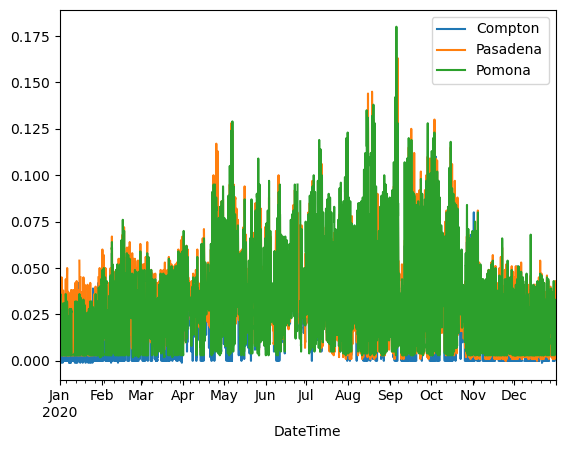

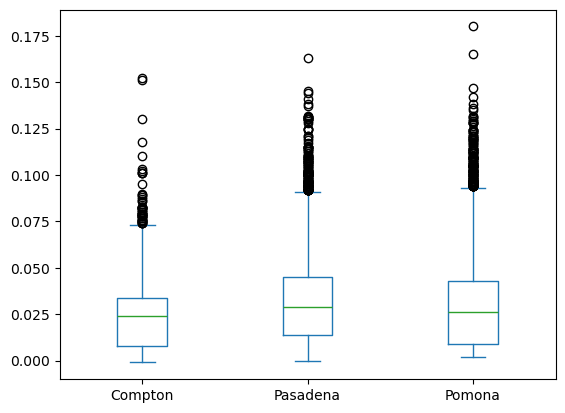

In [11]:
# Modify the code below to create box-plots for the 3 stations. Extra cheers for labels etc.  
ozoneData.plot()
ozoneData.plot(kind='box')

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>

How would you interpret this plot?

</div>

If we assing another column with values for month, we can also use the box plot functionality to investigate the annual cycle of ozone by separating the data `by='month'`

Compton        Axes(0.125,0.11;0.227941x0.77)
Pasadena    Axes(0.398529,0.11;0.227941x0.77)
Pomona      Axes(0.672059,0.11;0.227941x0.77)
dtype: object

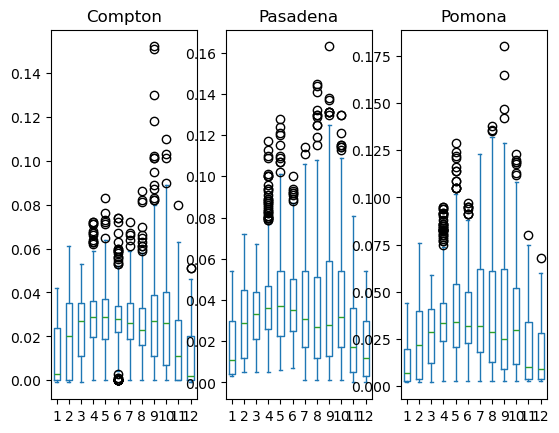

In [12]:
ozoneData['month']=ozoneData.index.month
ozoneData.plot(kind='box', by='month')

## Calculating Air Quality Index

Remember the [Air Quality Index](https://www.airnow.gov/aqi/) from your classes? 

It turns out that calculating the AQI is a bit more complicated than I remember and [every country uses their own scale](https://en.wikipedia.org/wiki/Air_quality_index). In the U.S., the EPA calculates the AQI for each criteria air pollutant using a [table of thresholds](https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf) for each category and then uses the highes criteria air pollutant AQI as the total AQI.  

For the sake of simplicity, lets define our own ISAT 420 AQI. In our case, let's use a simple scaling based on the [National Ambient Air Quality Standards](https://www.epa.gov/criteria-air-pollutants/naaqs-table). We define each component AQI as

$AQI = \frac{\text{Pollutant Concentration}}{\text{Reference Standard}} \times 100$

We use the following reference standards.

Ozone(1hr)  = 0.124 ppm

PM2.5(24hr) = 35.4 $\mu g\,m^{-3}$

NO2(1hr) = 100 ppb


Our workflow will be as follows. We will

- focus on Compton, because it has data for NO2, PM2.5, and Ozone. 
    - We need to confirm that our units are the same 
- caclulate each component AQI
- create a new dataframe with daily resolution that contains all component AQIs
- determine AQI as the maximum 


In [13]:
ozoneStandard = 0.124
pmStandard = 35.4
NO2Standard = 100

# Add two more lines below to calculate aqi for pm2.5 and NO2
aqi_ozone = aqs_Compton['sample_measurement'].loc[aqs_Compton['parameter']=='Ozone']/ozoneStandard*100

# Add two more lines below to calculate aqi for pm2.5 and NO2

aqi_pm = aqs_Compton['sample_measurement'].loc[aqs_Compton['parameter']=='PM2.5 - Local Conditions']/pmStandard*100

aqi_no2 = aqs_Compton['sample_measurement'].loc[aqs_Compton['parameter']=='Nitrogen dioxide (NO2)']/NO2Standard*100


We should note that ozone and NO2 are hourly AQIs and PM2.5 is sampled daily. So we should resample all data to daily. This will also take care with periods of missing data. 

In [14]:
print(aqi_ozone.head())
print(aqi_pm.head())
print(aqi_no2.head())

DateTime
2020-01-01 00:00:00    0.806452
2020-01-01 01:00:00    0.806452
2020-01-01 02:00:00    0.000000
2020-01-01 03:00:00    0.000000
2020-01-01 04:00:00    0.000000
Name: sample_measurement, dtype: float64
DateTime
2020-01-01     92.372881
2020-01-02     62.146893
2020-01-03     71.468927
2020-01-04    103.954802
2020-01-05    103.107345
Name: sample_measurement, dtype: float64
DateTime
2020-01-01 00:00:00    28.9
2020-01-01 01:00:00    27.5
2020-01-01 02:00:00    26.6
2020-01-01 03:00:00    25.6
2020-01-01 04:00:00    24.7
Name: sample_measurement, dtype: float64


Let's create our new aqi dataframe with each data resampled to 1D. `.resample('1D').mean()` would average each value to get a daily value. It is probably a better idea to take the daily max instead `.max()`.

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>

Complete the code below to create our aggregated AQI Dataframe

</div>

In [15]:
aqi_Compton = pd.DataFrame()
# Modify the line below to resample to 1D using the maximum value in each day. 
aqi_Compton['Ozone']= aqi_ozone.resample('1D').max()
# Complete two lines below to add PM2.5 and NO2
aqi_Compton['PM']= aqi_pm.resample('1D').max()
aqi_Compton['NO2']= aqi_no2.resample('1D').max()
aqi_Compton

,Ozone,PM,NO2
DateTime,,,
2020-01-01,33.064516,92.372881,28.9
2020-01-02,27.419355,62.146893,39.6
2020-01-03,16.935484,71.468927,44.9
2020-01-04,26.612903,103.954802,40.6
2020-01-05,30.645161,103.107345,33.8
...,...,...,...
2020-12-27,24.193548,44.067797,NaN
2020-12-28,NaN,30.225989,NaN
2020-12-29,NaN,49.435028,41.1


We can then find the maximum value of each row and assing this to a new column. 

In [16]:
aqi_Compton['AQI_Total']=aqi_Compton.max(axis=1)
aqi_Compton

,Ozone,PM,NO2,AQI_Total
DateTime,,,,
2020-01-01,33.064516,92.372881,28.9,92.372881
2020-01-02,27.419355,62.146893,39.6,62.146893
2020-01-03,16.935484,71.468927,44.9,71.468927
2020-01-04,26.612903,103.954802,40.6,103.954802
2020-01-05,30.645161,103.107345,33.8,103.107345
...,...,...,...,...
2020-12-27,24.193548,44.067797,NaN,44.067797
2020-12-28,NaN,30.225989,NaN,30.225989
2020-12-29,NaN,49.435028,41.1,49.435028


Plotting this reveals, which variable is most responsible. 

<Axes: xlabel='DateTime'>

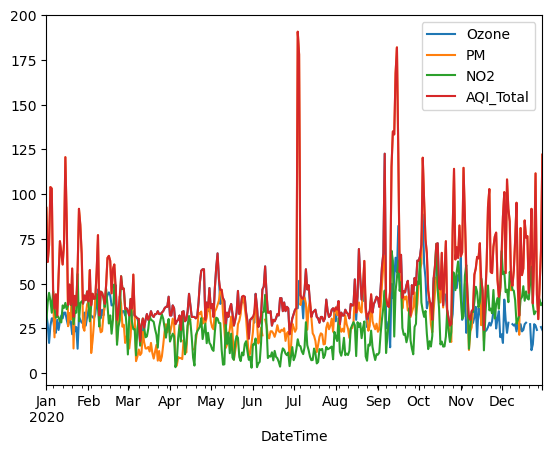

In [17]:
aqi_Compton.plot()

In [18]:
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good','Moderate','Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Hazardous']
aqi_Compton['AQI_Class']=pd.cut(aqi_Compton['AQI_Total'], bins, labels= labels)

In [19]:
aqi_Compton['AQI_Class'].value_counts()

AQI_Class
Good                              247
Moderate                           99
Unhealthy for Sensitive Groups     16
Unhealthy                           4
Very Unhealthy                      0
Hazardous                           0
Name: count, dtype: int64